In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
'''

images = []
data_dir = "data/"
file1_name = "image_0.txt"


images = [[float(pix) for pix in img.split(",")] for img in open(data_dir+file1_name)]

images = np.reshape(images,(5000,20,20)) #reshaping the arry
images = [np.rot90(img) for img in images] #rotating it by 90 deg


'''

'\n\nimages = []\ndata_dir = "data/"\nfile1_name = "image_0.txt"\n\n\nimages = [[float(pix) for pix in img.split(",")] for img in open(data_dir+file1_name)]\n\nimages = np.reshape(images,(5000,20,20)) #reshaping the arry\nimages = [np.rot90(img) for img in images] #rotating it by 90 deg\n\n\n'

In [3]:
'''
plt.imshow(images[3000], cmap="bone",origin ="lower")
plt.show()
plt.imshow(images[4000], cmap="bone",origin ="lower")
'''

'\nplt.imshow(images[3000], cmap="bone",origin ="lower")\nplt.show()\nplt.imshow(images[4000], cmap="bone",origin ="lower")\n'

# Organizing data and labels

In [3]:
def vectorize_label(y):
    if y == 10:
        y=0
    label = np.zeros(10)
    #print(type(y))
    label[y] = 1
    #print(label)
    
    return label

In [4]:
X = []
y = []
data_dir = "data/"
data_file = "image_0.txt"
label_file = "label.txt"

X = [[float(pix) for pix in  img.split(",") ] for img in open(data_dir+data_file)]
y = [vectorize_label(int(label)) for label in open(data_dir+label_file)]

X = [np.reshape(x,(400,1)) for x in X]


print(len(X))
print(len(y))

5000
5000


## displaying an image from the dataset

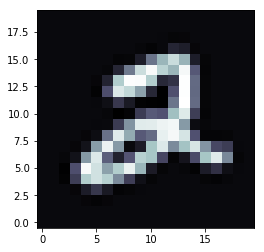

In [5]:
img = X[1000]
img = np.reshape(img,(20,20)) #reshaping the vector to be 20x20
img = np.rot90(img) #rotate by 90° the array to be readable 

plt.imshow(img, cmap="bone",origin ="lower")

## train test split

In [7]:
train_indexes = list()
test_indexes = list()

threshold = 0.7

for i in range(len(X)):
    if np.random.uniform(0,1) < threshold:
        train_indexes += [i]
    else:
        test_indexes += [i]

X_train = [np.array(X[i]) for i in train_indexes ]
y_train = [y[i] for i in train_indexes ]

X_test = [np.array(X[i]) for i in test_indexes ]
y_test = [y[i] for i in test_indexes ]


print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

3499 3499
1501 1501


## Creating the neural network

For the sake of simplicity, our network will only have 3 layers, 1 for the input, 1 that is 'hidden' and a last one for the outputs. The respective dimensions (number of neurons/inputs) of each of these layes will be:
$$ [400,30,10]$$

Each layer, except the first one has a weight matrix (because each neuron of each layer is connected to every neuron of the previous layer) and a bias vector (bias being the intercept in our linear function)

In [8]:
network_dimensions = [400,30,10]
num_layers = len(network_dimensions)
#initialise biases according to a normal distribution of mean 0 and variance 1
biases = [np.random.randn(x,1) for x in network_dimensions[1:] ] #creates a matrixs of biases for each layer except the first
#same for the weights except the matrix is larger
#creates a l-1 X l matrix for each layer except the first one, each neuron in layer l will have as many weights as there are neurons in l-1 
weights = [np.random.rand(y,x) for x,y in zip(network_dimensions[:-1],network_dimensions[1:])]



In [9]:

for x,y in zip(network_dimensions[:-1],network_dimensions[1:]):
    print("X:",x,'Y:',y) 

X: 400 Y: 30
X: 30 Y: 10


## Forward propagation

there are 2 big steps for the neural network, first we perform forward propagation, in this step we feed the inputs though the 1st layer, these inputs then are passed through the network in order to activate the second layer and so on.
The second step is backpropagation where we modify the model's parameters after having calculated the SSE and performing gradient descent.

the main steps to forward propagation are:

1) take input

2) multiply by a weight

3) add a bias

4) pass through activation function

5) feed output of activation to the next layer and so on until reaching the output

### activation function
There are a few choices out there of what kind of activation function we can use on our neural network like Relu, Tanh or sigmoid. We are using the sigmoid or logistic function
$$ h(z)= \frac{1}{1+e^{-z}} $$

In [10]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

## feed forward:
this step consists in taking in an input and propagating it through the network. We return the vector of outputs that will classify 

In [11]:
def feed_forward(a,weights,biases):
    a = np.reshape(a,(400,1))
    for b,w in zip(biases,weights):
        
        #print(w.shape,"*",a.shape)
        #print(b.shape)
        a = sigmoid(np.dot(w,a)+b)
    return a

In [12]:
im = X_train[0]
out = y_train[0]

pred = feed_forward(im,weights,biases)

print(pred)
print(out)

[[0.99999958]
 [0.99999835]
 [0.99999999]
 [0.99999984]
 [0.99999958]
 [0.99999945]
 [0.99999504]
 [0.99999978]
 [0.99999995]
 [0.99999694]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## training the network
To train our network we need to progressively improve the accurancy of the network and minimize the Cost function. 

The method in which we are modifying the weights and biases in order to minimize the cost function is by using backpropagation. backproagation consists in propagaing the error bakwards and calculating its partial derivative with respect to the weights and biases. With this method, we can change the value of the weights one by one until we converge towards a local (or global minimum)

We first need to define some terms and a specific notation.
$$ w^l_{j,k} $$ 
Where:
- l layer number
- k index of neuron in l-1 layer
- j index of neuron in lth layer
therefore, this denotes the weight in the lth layer going from the K th neuron in layer l-1 to J th neuron in layer l

Then, we define the activation of the J th neuron in layer l as:
$$ a^{l}_j = \sigma\left( \sum_k w^{l}_{jk} a^{l-1}_k + b^l_j \right) $$


Next, we will define a total of 4 equations that will help us calculate the partial derivatives necessary to perform backropagation. 

1) $$  \delta^L_j = \frac{\partial C}{\partial a^L_j} \sigma'(z^L_j) $$

where delta represents the error derivative in the output layer L

We can also show this function in a simpler notation with: $ \delta^L = \nabla_a C \odot \sigma'(z^L) $ where $\odot$ is the hadamard product (element-wise product)

2) $$\delta^l = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^l)$$

Where the error derivative from any layer relates to the layers further down the network. The terms $w^{l+1})^T \delta^{l+1}$ can be intuitively understood as propagating backwards the prediction error

3) $$\frac{\partial C}{\partial b^l_j} = \delta^l_j $$

The rate of change of the cost with respects to the biases in the network


4)  $$\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$$

The rate of change of the cost with respects to the weights in the network.

In [13]:
def sigmoid_prime(z):
    #computes the derivative of the sigmoid function
    return sigmoid(z)*(1-sigmoid(z))

In [14]:
def cost_prime(y_pred,y):
    #computes the derivative of the cost function which is simply the difference between our predction and the actual y value
    y = np.reshape(y,(10,1))
    return (y_pred-y)

In [15]:
def SSE(y_pred,y):
    error = 0
    for pred,real in zip(y_pred,y):
        error += (pred-real)**2
    return error

In [16]:
def backpropagate(x,y,weights,biases): 
    nabla_w = [np.zeros(w.shape) for w in weights]
    nabla_b = [np.zeros(b.shape) for b in biases]
    
    a = np.reshape(x,(400,1)) #reshaping the 'image' so its dimensions are proper for matrix multiplication
    activations = [] # we store the activation at each layer
    activations = [a] #first activation is our inputs
    Zs = [] # we store the weighted sum as well 
    
    #feed forward part
    for b,w in zip(biases,weights):
        z = np.dot(w,a) + b # calculate weighted sum
        Zs.append(z) #append it for later
        a = sigmoid(z) # calculate activation
       
        activations.append(a) # save activation for computing gradient 
    
    ## backward pass 
    
    delta_L = cost_prime(activations[-1],y) * sigmoid_prime(Zs[-1]) #see equation 1 above
    
    #inserting this delta to compute equations 3 and 4 (respectively)
    nabla_b[-1] = delta_L
    nabla_w[-1] = np.dot(delta_L,activations[-2].transpose())
    
    # propagate the error bakwards to compute the weight and bias gradient for all layers
    # we use the negative indexing of python to reffer to layers from the end to the front
    delta_l = delta_L
    for l in range(2,num_layers):
        Z_l = Zs[-l]
        delta_l = np.dot(weights[-l+1].transpose(), delta_l) * sigmoid_prime(Z_l) # see equation 3
        
        nabla_b[-l] = delta_l
        nabla_w[-l] = np.dot(delta_l,activations[-l - 1].transpose())
        
        #print(nabla_w[1])
    
    return nabla_w,nabla_b

## stochastic gradient descent

To train our NN, we will be implementing stochastic gradient descent. Instead of taking the average SSE (MSE) and using this value for backpropagation.  

In [17]:
def fit(X,y,weights,biases,learning_rate,nb_epochs,batch_size,test_data):
    epoch_cost = []
    costs = [] #to keep track of our sse over the epochs
    training_data = list(zip(X,y))
    train_samples = len(X)
        
    for epoch in range(nb_epochs):
        print("starting epoch:",epoch,"score:",eval(test_data,weights,biases),"/",len(test_data))
        #making up our batches
        
        random.shuffle(training_data)
        mini_batches = [training_data[k:k+batch_size]  for k in range(0, train_samples, batch_size)]
        #print(mini_batches)
        #iterate over our batches
        for batch in mini_batches:
            X_batch,y_batch = zip(*batch) #unzip our batch back to input and labels
            weights,biases = update_batch(X_batch,y_batch,weights,biases)
            
    
    return weights,biases

In [18]:
def update_batch(X,y,weights,biases):
    #feedforward part, we also keep the activation of each layer of neurons 
    #so that it is simpler when performing backpropagation later
    nabla_weights = [np.zeros(w.shape) for w in weights]
    nabla_biases   = [np.zeros(b.shape) for b in biases]

    for i,x in enumerate(X):
        #gets partial derivatives for weights and biases with respects to the cost
        delta_nabla_weights,delta_nabla_biases = backpropagate(x,y[i],weights,biases)

        # add the delta calculated above to the nabla w and b, we will average the changes later
        nabla_biases = [nb+dnb for nb,dnb in zip(nabla_biases,delta_nabla_biases)]
        nabla_weights = [nw+dnw for nw,dnw in zip(nabla_weights,delta_nabla_weights)]

    #after having completed all the train examples, we update the weights and biases before the next epoch
    # we average the changes given by the consecutive backpropagations and apply this change to the w and b taking into account the learning rate
    biases = [b - (learning_rate/len(X))*nb for b,nb in zip(biases,nabla_biases)]
    weights = [w - (learning_rate/len(X))*nw for w,nw in zip(weights,nabla_weights)]
    
    return weights,biases

In [19]:
def eval(train_data,weights,biases):
    preds = [(np.argmax(feed_forward(x,weights,biases)),np.argmax(y)) for x,y in train_data ]
    score = sum(int(x==y) for (x,y) in preds)
    return score
    

In [20]:
learning_rate = 10.0
n_epochs = 100
batch_size = 100

test_data = list(zip(X_test,y_test))

weights,biases = fit(X_train,y_train,weights,biases,learning_rate,n_epochs,batch_size,test_data)

starting epoch: 0 score: 172 / 1501
starting epoch: 1 score: 172 / 1501
starting epoch: 2 score: 172 / 1501
starting epoch: 3 score: 172 / 1501
starting epoch: 4 score: 172 / 1501
starting epoch: 5 score: 172 / 1501
starting epoch: 6 score: 172 / 1501
starting epoch: 7 score: 172 / 1501
starting epoch: 8 score: 172 / 1501
starting epoch: 9 score: 172 / 1501
starting epoch: 10 score: 172 / 1501
starting epoch: 11 score: 172 / 1501
starting epoch: 12 score: 172 / 1501
starting epoch: 13 score: 172 / 1501
starting epoch: 14 score: 172 / 1501
starting epoch: 15 score: 172 / 1501
starting epoch: 16 score: 172 / 1501
starting epoch: 17 score: 172 / 1501
starting epoch: 18 score: 172 / 1501
starting epoch: 19 score: 172 / 1501
starting epoch: 20 score: 172 / 1501
starting epoch: 21 score: 172 / 1501
starting epoch: 22 score: 172 / 1501
starting epoch: 23 score: 172 / 1501
starting epoch: 24 score: 172 / 1501
starting epoch: 25 score: 172 / 1501
starting epoch: 26 score: 172 / 1501
starting ep

KeyboardInterrupt: 

In [ ]:
def predict(X_test,y_test,weights,biases):
    correct = 0
    incorrect = 1
    
    for x,y in zip(X_test,y_test):
        pred = feed_forward(x,weights,biases)
        

In [ ]:
im = X_train[1000]
out = y_train[1000]

pred = feed_forward(im,weights,biases)

print(pred)
print(out)